# TD7 - Đọc phiếu chấm học bổng Đồng Hành

## Mô tả

<a href="donghanh.net">Quỹ học bổng Đồng Hành</a> được thành lập và quản lí bởi một nhóm du học sinh Việt Nam tại Pháp, thực hiện ý tưởng gây quỹ và trao học bổng cho những sinh viên nghèo hiếu học tại hơn 15 trường đại học ở Việt Nam. Ở mỗi học kì, sinh viên có nguyện vọng sẽ làm hồ sơ xin học bổng Đồng Hành. Một hội đồng giám khảo ở Pháp (thường là các du học sinh) sẽ nghiên cứu các hồ sơ này cùng kết quả một vòng phỏng vấn để quyết định chọn những ứng viên xứng đáng nhất để trao học bổng.

Để đánh giá và so sánh các ứng viên với nhau, mỗi giám khảo sẽ đọc các hồ sơ và cho 4 điểm số ứng với các tiêu chí: hoàn cảnh, học tập, ước mơ và điểm cộng dưới dạng một điểm số từ 0 đến 10 và ghi vào một phiếu chấm. Trong TD này ta giả định điểm luôn là một số **nguyên**.

Hình dưới đây minh hoạ một phiếu chấm như vậy. (Tên các ứng viên có thể đã được thay đổi)

<img src="https://raw.githubusercontent.com/riduan91/DSC101/ba2b4d2aa94cc56bfa6757666b13731d335fe547/Lesson7/TD/RawForm/BKDN_1.jpg"/ width=800; >

Sau đó, ban tổ chức sẽ thu lại phiếu chấm của tất cả các giám khảo và nhập điểm vào máy tính (cơ sở dữ liệu), thực hiện việc tổng hợp điểm để tính toán kết quả cuối cùng. Việc nhập điểm hiện nay được thực hiện bằng tay.


## Yêu cầu


Trong TD này, ta xây dựng một chương trình để từ bản scan phiếu chấm, tự động đọc ra kết quả dưới dạng các điểm số ứng với các ứng viên để thay cho việc con người tự đọc và nhập điểm.

- Ở phần 1, ta sẽ sử dụng thư viện **`opencv`** (hay **cv2**), một thư viện hỗ trợ xử lí hình ảnh để giúp biến mỗi hình ảnh thành một numpy array, và xử lí những thao tác cơ bản như biến ảnh màu thành trắng đen, tìm các đường ngang dọc trong hình. Sau đó, lọc ra các ô chứa điểm (4 ô ứng với cột "hoàn cảnh", "học tập", "ước mơ", "điểm cộng" giao với các hàng). Dữ liệu là hình ảnh các phiếu chấm được scan với chất lượng khá tốt, định dạng jpg, dung lượng không quá lớn (khoảng 500KB)

- Ở phần 2, ta sẽ sử dụng các mô hình đã học để phân loại chữ số dựa trên dữ liệu là những ô điểm mà ta đã lọc ra.

- Ở phần 3, ta sẽ sử dụng dữ liệu có sẵn từ data set MNIST để phân loại lại các chữ số và dự đoán với các ô điểm trong dữ liệu riêng của ta.

- Cuối cùng, ta viết một hàm hoàn chỉnh để xuất ra điểm số từ dữ liệu đầu vào là ảnh phiếu chấm trên.

Bạn cần viết các hàm và hoàn thành các class trong file `DHEvaluation.py` và chạy các test theo hướng dẫn ở các bài tập để kiểm tra hàm đã viết.

In [1]:
from DHEvaluation_Solution import *

## Phần 1 - Lọc ra các ô điểm. Class `EvaluationForm`

### Bài 1 - Cài đặt thư viện opencv

*Hãy tìm cách cài đặt thư viện opencv. (Bạn có thể google, "Install opencv with conda"). *

Đoạn code test sau cần chạy không có lỗi.

In [2]:
import cv2

### Bài 2 - Đọc hình ảnh

Chức năng chính của **`cv2`** là biến mỗi hình ảnh thành một numpy array. Ví dụ trong đoạn code dưới đây, ta có một hình ảnh tại đường dẫn `RawForm/BKDN_1.jpg`. Hàm **`imread`** của **`cv2`** sẽ đọc hình ảnh và biểu diễn nó dưới dạng một numpy array như sau:

In [3]:
img = cv2.imread("RawForm/BKDN_1.jpg", cv2.IMREAD_GRAYSCALE)
print(img)
print(img.shape)

[[ 47  49  66 ... 246  55  20]
 [204 203 210 ... 245  54  21]
 [255 254 252 ... 241  51  23]
 ...
 [255 255 255 ...  52  32  17]
 [255 255 255 ...  29  24  13]
 [255 255 255 ...  12  17   9]]
(2480L, 3504L)


Do `RawForm/BKDN_1.jpg` là hình ảnh có kích thước 2480 pixel x 3504 pixel, numpy array được trả lại cũng có kích thước tương ứng. Tham số `cv2.IMREAD_GRAYSCALE` nói rằng ta muốn đọc ảnh dưới dạng đen trắng. Mỗi phần tử trong numpy array là một số nguyên trong đoạn \[0, 255\]: 0 là màu đen, 255 là màu trắng, giữa hai giá trị là các màu xám đậm nhạt khác nhau. Thư viện **`matplotlib`** sẽ giúp ta "vẽ" lại các hình ảnh từ numpy array trên. 

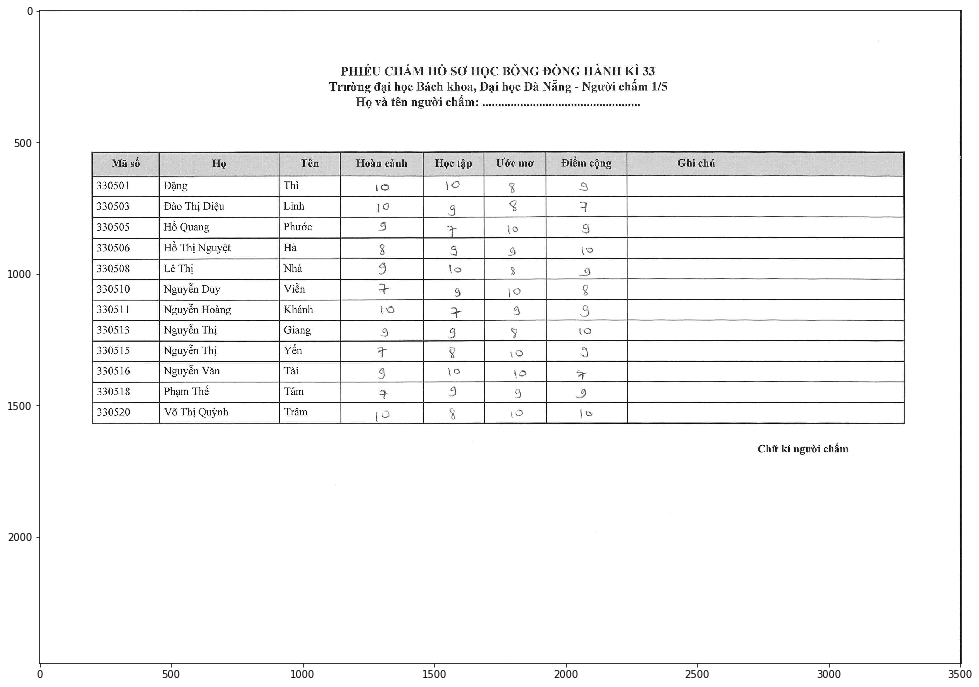

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,12))
plt.imshow(img, cmap='gray')

Trong nhiều bài toán, ta không cần quan tâm đến các màu xám, mà sẽ biến hình ảnh thành các ảnh thuần tuý trắng đen. Ví dụ: ta sẽ cho các điểm có giá trị $<$168 thành màu đen và $\geq$168 thành màu trắng. Khi đó, hàm **`threshold`** sẽ giúp ta. (Tham số `cv2.THRESH_BINARY` nói rằng ta muốn đưa ảnh về trắng đen)

In [5]:
thres, black_white_img = cv2.threshold(img, 168, 255, cv2.THRESH_BINARY)
print thres
print black_white_img

168.0
[[  0   0   0 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


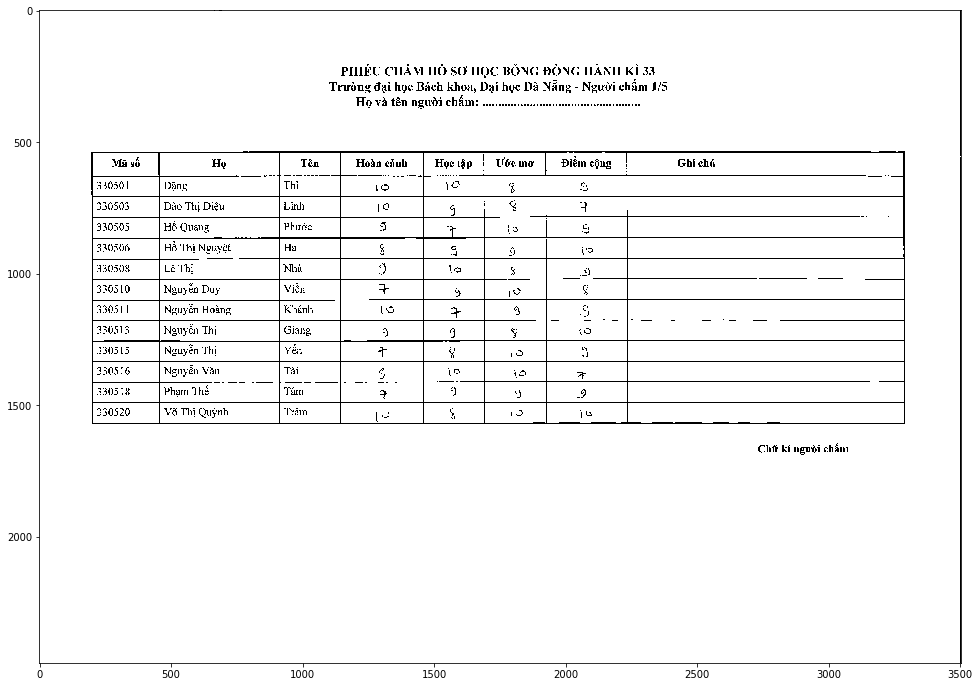

In [6]:
plt.figure(figsize=(20,12))
plt.imshow(black_white_img, cmap='gray')

Ta sẽ thiết lập một class **`EvaluationForm`** mô tả một phiếu chấm, trong đó attribute **`self.img`** là biểu diễn dạng trắng đen của hình ảnh ứng với phiếu chấm đó. **`self.img`** sẽ luôn là một array có kích thước bằng kích thước hình ảnh, và có mỗi phần tử nhận giá trị 0 hoặc 255.

*Hãy viết instant method **`__init__(self, source_image)`** nhận đối số **`source_image`** là đường dẫn của hình ảnh và khởi tạo instance **`self`** của class **`EvaluationForm`** bằng cách gán cho attribute **`self.img`** numpy array biểu diễn dạng đen trắng của hình ảnh đó. Ta chọn giá trị `self.BLACK_WHITE_THRESHOLD = 168` để chia đen trắng.*

Đoạn code dưới đây test hàm của bạn.

In [7]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.img
print myform.img.shape

[[  0   0   0 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
(2480L, 3504L)


### Bài 3 - Xác định các đường viền (contour)

*Đọc tài liệu sau đây: https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html để hiểu cách cv2 xác định các đường viền.*

*Viết instant method **`getEdges()`** trong class **`EvaluationForm`** trả lại một numpy array biểu diễn tất cả các đường viền của hình ảnh tương ứng (các điểm thuộc một đường viền sẽ có màu trắng, những điểm không thuộc đường viền nào sẽ có màu đen). Bạn có thể sử dụng các giá trị sau làm $minVal$ và $maxVal$ trong tài liệu.*

``` python
EDGE_LOW_VALUE = 100
EDGE_HIGH_VALUE = 800
```

Đoạn code dưới đây giúp test hàm của bạn.

In [8]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.getEdges()

[[255 255 255 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


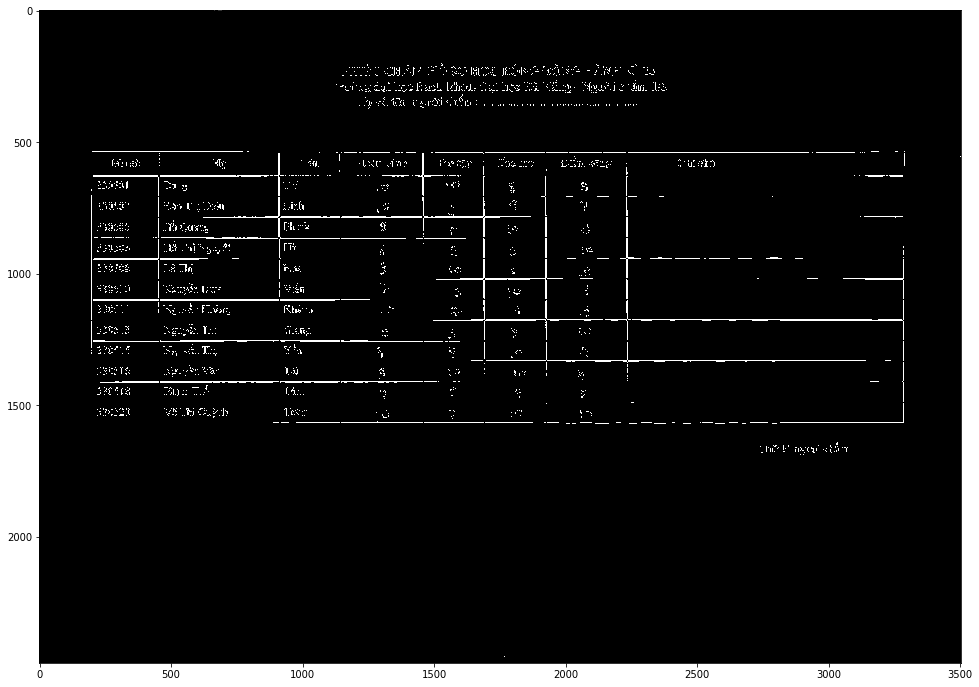

In [9]:
plt.figure(figsize=(20,12))
plt.imshow(myform.getEdges(), cmap='gray')

Bạn có thể zoom một khu vực để nhìn rõ hơn, ví dụ: 400 pixel trung tâm theo mỗi chiều của hình.

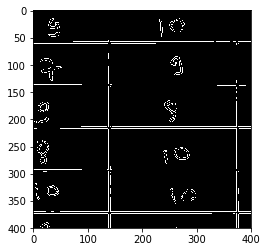

In [10]:
edges = myform.getEdges()
height, width = edges.shape
plt.imshow(edges[height//2 - 200: height//2 + 200, width//2 - 200: width//2 + 200], cmap='gray')

### Bài 4 - Xác định các đường ngang dọc

Sau khi xác định các đường viền, điều ta quan tâm là các đường kẻ ngang và dọc của bảng. Xác định được các đường ngang dọc này, ta sẽ xác định được các ô của bảng điểm.

Giả sử `edges` là numpy array biểu diễn các đường viền (output của bài 3), phép toán

``` python
lines = cv2.HoughLinesP(edges, 2, np.pi/2, VOTE)
```

sẽ giúp ta xác định các đường ngang hoặc dọc có đạt đến một ngưỡng `VOTE`. (Hãy tìm hiểu thuật toán HoughLine trong tìm kiếm hình ảnh để hiểu `VOTE` là gì và vì sao như vậy).

Kết quả sẽ được biểu diễn dưới dạng tung và hoành độ của điểm đầu, rồi tung và hoành độ của điểm cuối (điểm góc trên, bên trái có toạ độ 0, 0).

Ví dụ:

In [11]:
lines = cv2.HoughLinesP(edges, 2, np.pi/2, 500)
lines

array([[[2238, 1100, 2918, 1100],
        [ 200,  537,  776,  537],
        [3500, 2337, 3500,  339],
        ...,
        [1800,  305, 1802,  305],
        [2250,  247, 2259,  247],
        [1531,  362, 1531,  362]]])

Kết quả cho thấy thuật toán tìm ra một đoạn thẳng nằm ngang từ toạ độ (2238, 1100) đến (2918, 1100); một đoạn thẳng nằm ngang nằm từ toạ độ (200, 537) đến (776, 537); một đoạn thẳng nằm dọc từ (3500, 2337) đến (3500, 339).

Dùng `matplotlib`, ta có thể vẽ lại chúng như sau:

True

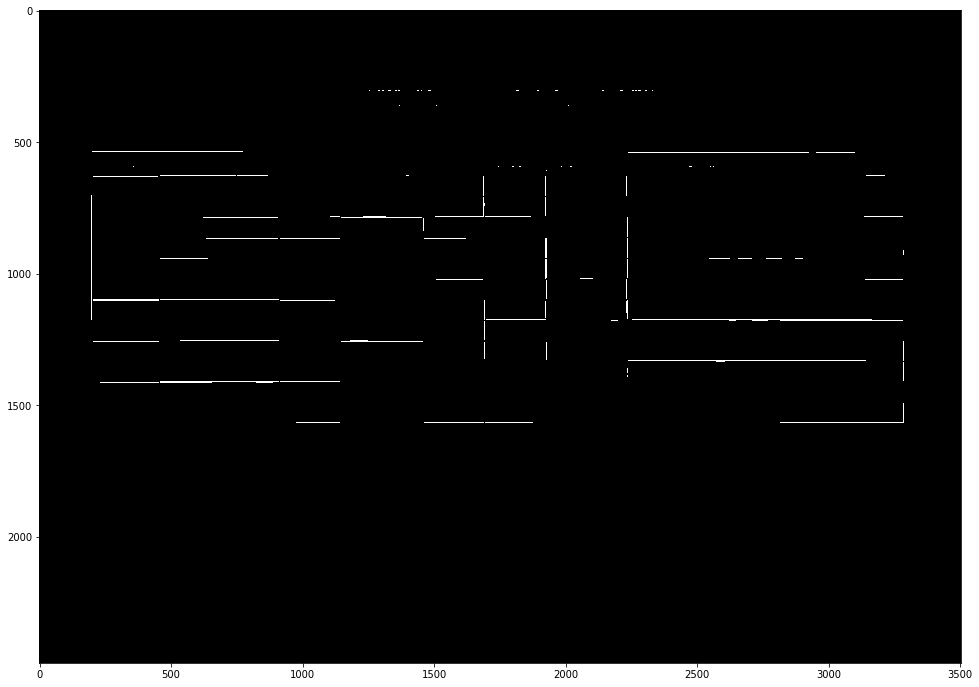

In [12]:
plt.figure(figsize=(20,12))
black_img = np.zeros(edges.shape) # Tạo 1 ảnh nền đen
for line in lines[0]:
    cv2.line(black_img, (line[0], line[1]),(line[2], line[3]),(255,255,255), 1) 
plt.imshow(black_img, 'gray')
cv2.imwrite('black_img.jpg', black_img)

Từ biểu diễn trên, ta nhận thấy các cạnh được trả lại không toàn vẹn. Hơn nữa, ta còn quan sát thấy một số đường thẳng "lạ" nằm ở vị trí tiêu đề của bảng điểm. Chúng không phải là các đường thẳng mà chỉ là những đường tạo ra bởi các vệt thẳng hàng từ chân các chữ cái trong tiêu đề.

Vì vậy ta sẽ loại những đường nằm ở bên ngoài bằng cách giới hạn các lề trái, phải, trên, dưới và chỉ nhận những đường thẳng nằm trong vùng này.

Trong class đã có các attribute sau:
``` python
    MARGIN_UP = 600
    MARGIN_DOWN = 100
    MARGIN_LEFT = 1140
    MARGIN_RIGHT = 300
```

*Hãy viết instance method **`getHorizontalLines()`** trả lại list tung độ của tất cả các đường nằm ngang được tìm ra từ thuật toán HoughLineP áp dụng lên ảnh các cạnh (output bài 3), sao cho các đường đó cách biên trên tối thiểu `MARGIN_UP` pixels và cách biên dưới tối thiểu `MARGIN_DOWN` pixels. Trong thuật toán HoughLineP, bạn nên sử dụng `MIN_VOTE_HORIZONTAL` làm số vote tối thiểu.*

*Tương tự, viết instance method **`getVerticalLines()`** trả lại list hoành độ của tất cả các đường nằm dọc được tìm ra từ thuật toán HoughLineP áp dụng lên ảnh các cạnh (output bài 3), sao cho các đường đó cách biên trái tối thiểu `MARGIN_LEFT` pixels và cách biên phải tối thiểu `MARGIN_RIGHT` pixels. Trong thuật toán HoughLineP, bạn nên sử dụng `MIN_VOTE_VERTICAL` làm số vote tối thiểu.*

Đoạn code dưới đây giúp test hàm của bạn.

In [13]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.getHorizontalLines() 
print myform.getVerticalLines() 

[627, 627, 627, 628, 628, 628, 628, 628, 628, 631, 631, 631, 632, 705, 705, 706, 706, 709, 709, 709, 709, 709, 709, 710, 710, 783, 783, 784, 784, 787, 787, 787, 788, 861, 861, 863, 865, 867, 940, 940, 940, 942, 943, 943, 944, 944, 944, 944, 946, 1018, 1018, 1019, 1021, 1022, 1025, 1097, 1097, 1099, 1100, 1103, 1175, 1177, 1177, 1179, 1253, 1253, 1253, 1253, 1254, 1255, 1257, 1257, 1258, 1258, 1331, 1331, 1332, 1332, 1332, 1335, 1335, 1336, 1409, 1409, 1409, 1410, 1413, 1413, 1413, 1413, 1413, 1413, 1413, 1414, 1414, 1414, 1487, 1487, 1488, 1488, 1491, 1492, 1566, 1566, 1566, 1566, 1567, 1571, 1572]
[1143, 1143, 1144, 1144, 1144, 1147, 1147, 1147, 1147, 1148, 1287, 1290, 1458, 1458, 1458, 1458, 1458, 1461, 1461, 1462, 1462, 1462, 1462, 1496, 1676, 1689, 1689, 1689, 1689, 1690, 1690, 1693, 1693, 1693, 1861, 1924, 1924, 1924, 1925, 1925, 1928, 1928, 1928, 1928, 2143, 2232, 2232, 2232, 2233, 2233, 2236, 2236, 2236, 2236, 2236, 2236]


### Bài 5 - Nhóm các đường ngang dọc

Đến đây ta đã có được hoành độ và tung độ các đường ngang dọc. Tuy nhiên, ta nhìn thấy chúng lặp lại và lệch sai số, ví dụ các tung độ 627, 628, 631, 632 có thể được xem là của cùng một đường ngang, nhưng bị lặp lại do nét vẽ đường ngang lớn hơn 1 pixel.

Vì vậy ta muốn nhóm chúng thành từng nhóm.

*Hãy viết instance method **`getHorizontalLineGroups()`** để từ output bài 4 (một list các tung độ tăng dần), trả lại một list các list con, sao cho 2 tung độ liền nhau nếu cách nhau không quá `ROW_GROUP_DISTANCE` (10 pixels) thì rơi vào cùng một list con.*

*Tương tự, hãy viết instance method **`getVerticalLineGroups()`** để từ output bài 4 (một list các hoành độ tăng dần), trả lại một list các list con, sao cho 2 hoành độ liền nhau nếu cách nhau không quá `COLUMN_GROUP_DISTANCE` (10 pixels) thì rơi vào cùng một list con.*

Đoạn code dưới đây giúp test hàm của bạn

In [14]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.getHorizontalLineGroups() 
print ""
print myform.getVerticalLineGroups() 

[[627, 627, 627, 628, 628, 628, 628, 628, 628, 631, 631, 631, 632], [705, 705, 706, 706, 709, 709, 709, 709, 709, 709, 710, 710], [783, 783, 784, 784, 787, 787, 787, 788], [861, 861, 863, 865, 867], [940, 940, 940, 942, 943, 943, 944, 944, 944, 944, 946], [1018, 1018, 1019, 1021, 1022, 1025], [1097, 1097, 1099, 1100, 1103], [1175, 1177, 1177, 1179], [1253, 1253, 1253, 1253, 1254, 1255, 1257, 1257, 1258, 1258], [1331, 1331, 1332, 1332, 1332, 1335, 1335, 1336], [1409, 1409, 1409, 1410, 1413, 1413, 1413, 1413, 1413, 1413, 1413, 1414, 1414, 1414], [1487, 1487, 1488, 1488, 1491, 1492], [1566, 1566, 1566, 1566, 1567, 1571, 1572]]

[[1143, 1143, 1144, 1144, 1144, 1147, 1147, 1147, 1147, 1148], [1287, 1290], [1458, 1458, 1458, 1458, 1458, 1461, 1461, 1462, 1462, 1462, 1462], [1496], [1676], [1689, 1689, 1689, 1689, 1690, 1690, 1693, 1693, 1693], [1861], [1924, 1924, 1924, 1925, 1925, 1928, 1928, 1928, 1928], [2143], [2232, 2232, 2232, 2233, 2233, 2236, 2236, 2236, 2236, 2236, 2236]]


Biểu diễn trên hình ảnh (bạn cần tự viết được đoạn code này)

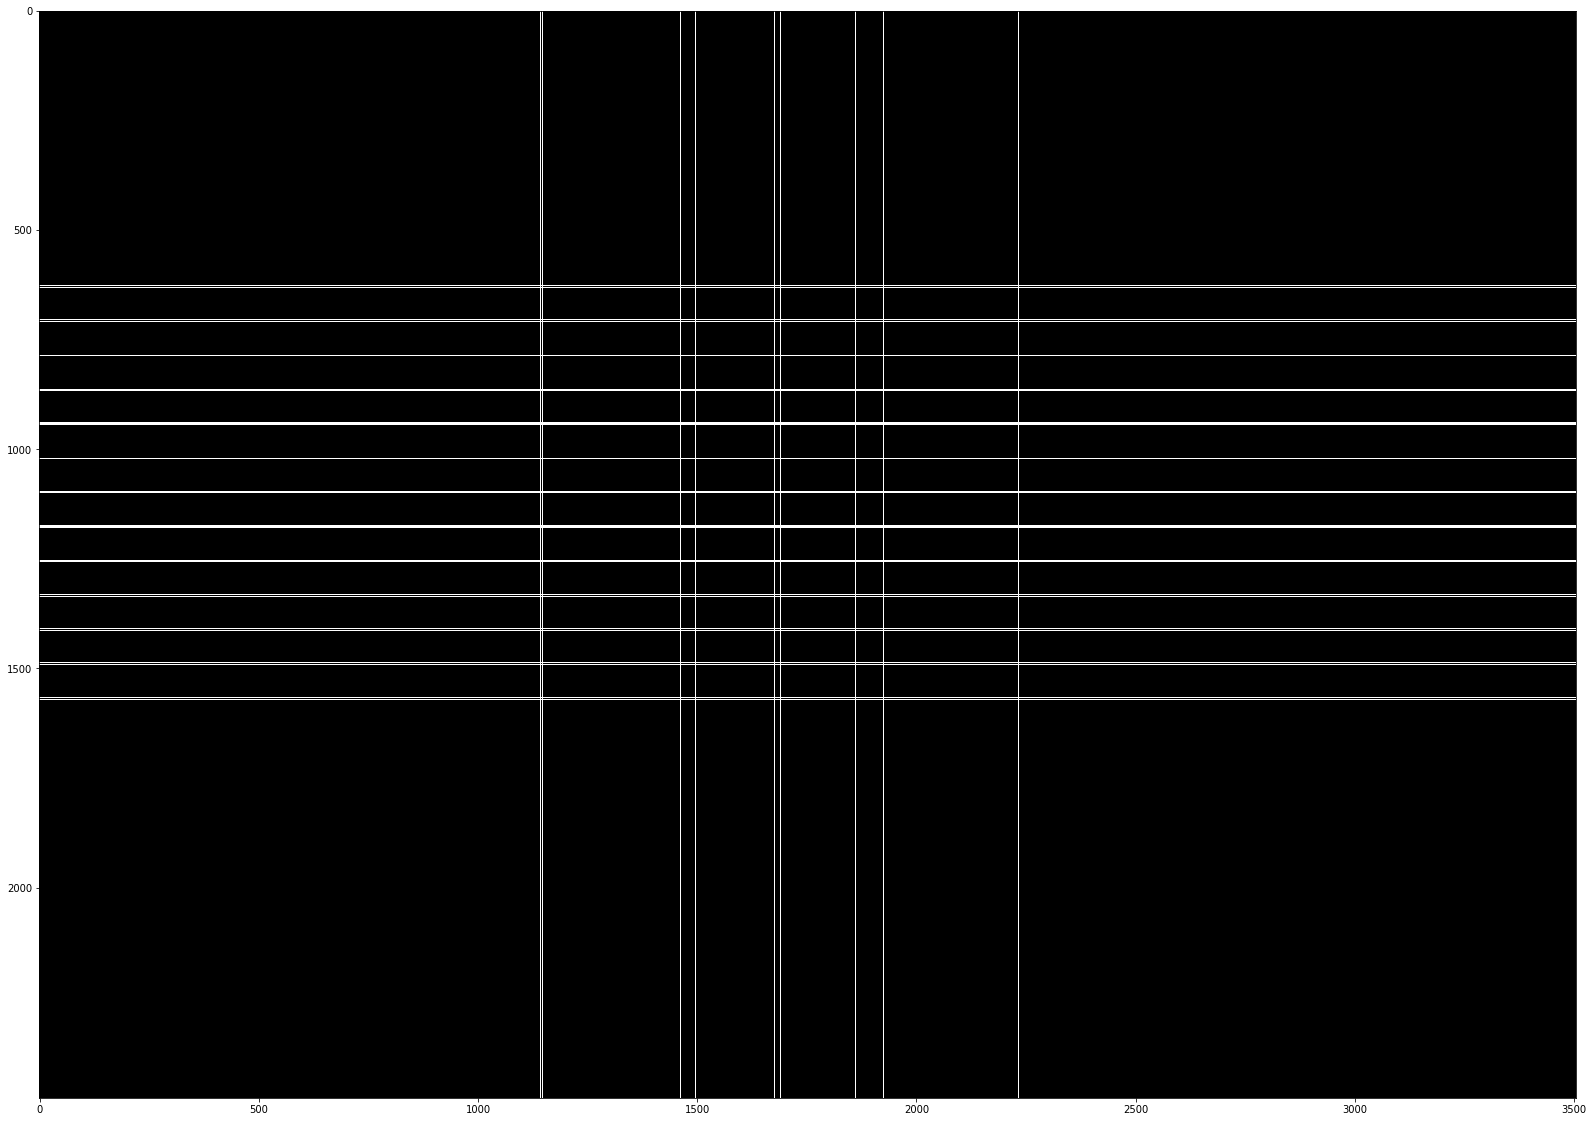

In [15]:
plt.figure(figsize=(40,20))
black_img = np.zeros(edges.shape) # Tạo 1 ảnh nền đen
for group in myform.getHorizontalLineGroups():
    for line in group:
        cv2.line(black_img, (0, line), (myform.img.shape[1], line),(255,255,255), 1) 
for group in myform.getVerticalLineGroups():
    for line in group:
        cv2.line(black_img, (line, 0), (line, myform.img.shape[0]),(255,255,255), 1) 
plt.imshow(black_img, 'gray')

### Bài 6 - Vấn đề của hình ảnh

Sau khi khảo sát các hình ảnh, ta phát hiện ra một vấn đề như sau: một số vị trí vốn không có đường ngang dọc nào, nhưng do lỗi của máy in hoặc máy scan, hoặc do ảnh được scan từ giấy A4 in 2 mặt có độ dài mỏng, nên 1 số đường ngang dọc "lỗi" xuất hiện trong output.

Ví dụ với output của bài 5, các đường nằm ngang không bị lỗi, nhưng các đường nằm dọc tại vị trí \[1287, 1290\], \[1496\], \[1676\], \[2143\] là các đường lỗi, không ứng với các đường kẻ của bảng điểm, mà ứng với 1 vệt bất thường do lỗi từ giấy, máy in hay máy scan.

Khảo sát cho thấy lỗi thuộc về máy in do việc in được thực hiện bằng cách quét theo các đường dọc, và một số đường không được quét.

Vì vậy, ta cần xử lí thêm hàm ở bài 5 để thu được các đường kẻ thực sự của bảng điểm. Khảo sát (từ một dự án khác) cho thấy các đường kẻ thực sự sẽ ứng với 1 list con gồm từ 3 phần tử trở lên, các đường giả sẽ ứng với 1 list con gồm 1 hoặc 2 phần tử.

*Hãy viết instance method **`getCleanHorizontalLineGroups()`** để trả lại 1 list các list con như output bài 5, nhưng chỉ giữ lại những list con gồm từ 3 phần tử trở lên. Tương tự với instance method **`getCleanVerticalLineGroups()`***

Chú ý rằng cách giải quyết của ta chỉ mang tính cá biệt (ta biết tất cả các ảnh được in và scan từ cùng máy). Việc xử lí chính xác hơn nằm ngoài mục đích của TD.

Đoạn code dưới đây giúp test hàm của bạn.

In [16]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.getCleanHorizontalLineGroups() 
print ""
print myform.getCleanVerticalLineGroups() 

[[627, 627, 627, 628, 628, 628, 628, 628, 628, 631, 631, 631, 632], [705, 705, 706, 706, 709, 709, 709, 709, 709, 709, 710, 710], [783, 783, 784, 784, 787, 787, 787, 788], [861, 861, 863, 865, 867], [940, 940, 940, 942, 943, 943, 944, 944, 944, 944, 946], [1018, 1018, 1019, 1021, 1022, 1025], [1097, 1097, 1099, 1100, 1103], [1175, 1177, 1177, 1179], [1253, 1253, 1253, 1253, 1254, 1255, 1257, 1257, 1258, 1258], [1331, 1331, 1332, 1332, 1332, 1335, 1335, 1336], [1409, 1409, 1409, 1410, 1413, 1413, 1413, 1413, 1413, 1413, 1413, 1414, 1414, 1414], [1487, 1487, 1488, 1488, 1491, 1492], [1566, 1566, 1566, 1566, 1567, 1571, 1572]]

[[1143, 1143, 1144, 1144, 1144, 1147, 1147, 1147, 1147, 1148], [1458, 1458, 1458, 1458, 1458, 1461, 1461, 1462, 1462, 1462, 1462], [1689, 1689, 1689, 1689, 1690, 1690, 1693, 1693, 1693], [1924, 1924, 1924, 1925, 1925, 1928, 1928, 1928, 1928], [2232, 2232, 2232, 2233, 2233, 2236, 2236, 2236, 2236, 2236, 2236]]


Biểu diễn trên hình ảnh:

True

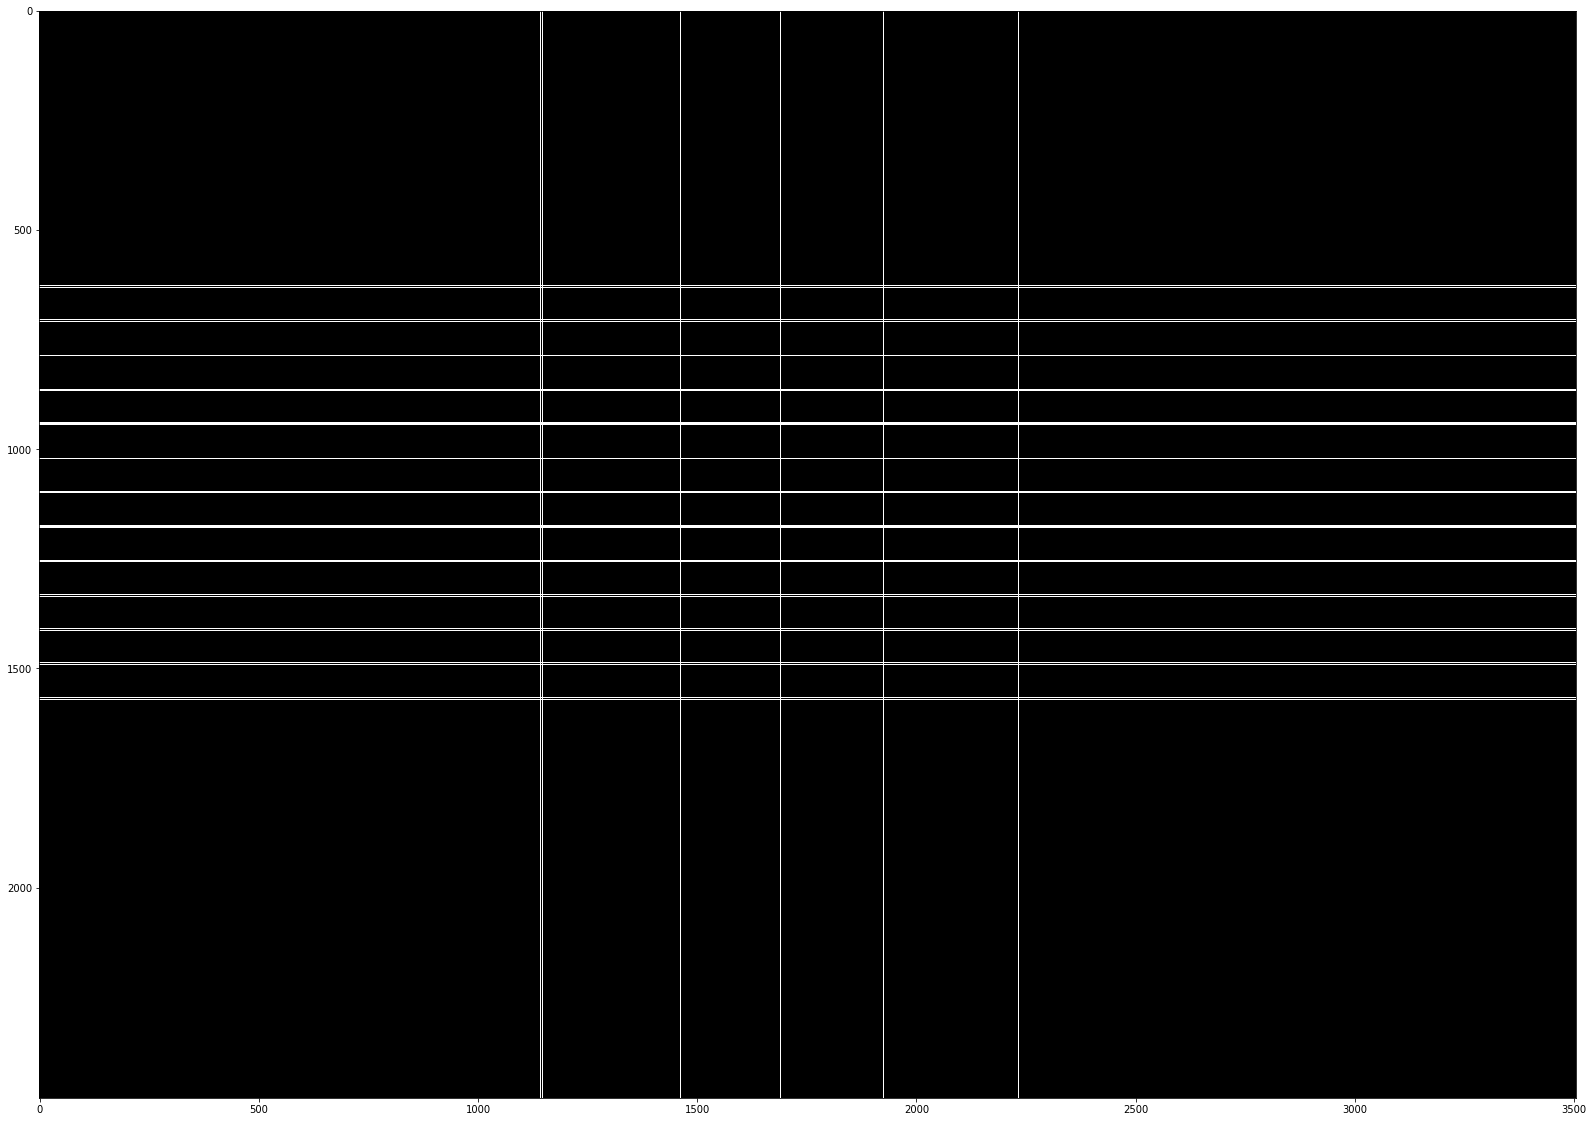

In [17]:
plt.figure(figsize=(40,20))
black_img = np.zeros(edges.shape) # Tạo 1 ảnh nền đen
for group in myform.getCleanHorizontalLineGroups():
    for line in group:
        cv2.line(black_img, (0, line), (myform.img.shape[1], line),(255,255,255), 1) 
for group in myform.getCleanVerticalLineGroups():
    for line in group:
        cv2.line(black_img, (line, 0), (line, myform.img.shape[0]),(255,255,255), 1) 
plt.imshow(black_img, 'gray')
cv2.imwrite('black_img.jpg', black_img)

### Bài 7 - Xác định cạnh của các ô điểm

Đến đây ta đã có các nhóm đường ngang dọc, chúng cho phép xác định toạ độ các ô điểm. Trong mỗi nhóm dọc, ta sẽ chọn đường ngoài cùng bên phải làm biên trái của ô điểm và đường ngoài cùng bên trái của nhóm dọc tiếp theo làm biên phải của ô điểm.

Ví dụ với `[[1143, 1143, 1144, 1144, 1144, 1147, 1147, 1147, 1147, 1148], [1458, 1458, 1458, 1458, 1458, 1461, 1461, 1462, 1462, 1462, 1462], [1689, 1689, 1689, 1689, 1690, 1690, 1693, 1693, 1693], [1924, 1924, 1924, 1925, 1925, 1928, 1928, 1928, 1928], [2232, 2232, 2232, 2233, 2233, 2236, 2236, 2236, 2236, 2236, 2236]]`, ta xác định biên trái và phải của 4 ô: ô thứ nhất có biên trái 1148 và biên phải 1458, ô thứ hai có biên trái 1462 và biên phải 1689, ô thứ ba 1693 -> 1924, ô thứ tư 1928 -> 2232.

Tương tự ở mỗi nhóm ngang, ta sẽ chọn đường dưới cùng làm biên trên của ô điểm và đường trên cùng ở nhóm tiếp theo làm biên dưới của ô điểm.

*Hãy viết 4 instance method: **`getCellLeftEdges()`**, **`getCellRightEdges()`**, **`getCellTopEdges()`**, **`getCellBottomEdges()`**: method thứ nhất trả lại list hoành độ các biên trái của các ô, method thứ hai trả lại list hoành độ biên phải của các ô, method thứ ba trả lại list tung độ biên trên của các ô, method thứ tư trả lại list tung độ biên dưới của các ô.*

Đoạn code dưới đây giúp test hàm của bạn.

In [18]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
print myform.getCellLeftEdges()

[1148, 1462, 1693, 1928]


In [19]:
print myform.getCellRightEdges()

[1458, 1689, 1924, 2232]


In [20]:
print myform.getCellTopEdges()

[632, 710, 788, 867, 946, 1025, 1103, 1179, 1258, 1336, 1414, 1492]


In [21]:
print myform.getCellBottomEdges()

[705, 783, 861, 940, 1018, 1097, 1175, 1253, 1331, 1409, 1487, 1566]


Để cắt ra một ô điểm: ví dụ ô ứng với cột đầu tiên ("Hoàn cảnh") của ứng viên đầu tiên, ta có thể dùng

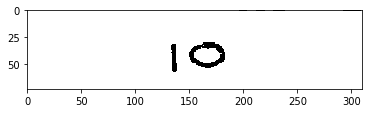

In [22]:
left, right, top, bottom = myform.getCellLeftEdges(), myform.getCellRightEdges(), myform.getCellTopEdges(), myform.getCellBottomEdges()
my_cell = myform.img[top[0]: bottom[0], left[0]: right[0]]
plt.imshow(my_cell, 'gray')

### Bài 8 - Cắt các ô điểm

Đến hết bài 7, ta đã biết cách xác định đường biên của các ô điểm cũng như cắt ra ô điểm. Bây giờ, ta sẽ cắt ra tất cả các ô điểm đó và lưu chúng vào các hình ảnh, theo phương pháp sau:

- Đầu tiên, loại bỏ 5 pixels ở 4 mép hình ảnh. Điều này giúp loại bỏ các đường kẻ màu đen của các ô điểm nếu chúng vô tình lọt vào hình ảnh. Mép 5 pixels này được biểu diễn bằng attribute `CELL_MARGIN = 5`.

- Tiếp theo, xét phần hình ảnh còn lại, cắt ra hình chữ nhật con (hình chữ nhật này có các cạnh song song với các đường biên) nhỏ nhất sao cho toàn bộ các pixel đen của hình nằm trong hình chữ nhật con đó. Nói cách khác, cắt ra hình chữ nhật con nhỏ nhất mà các pixel nằm ngoài hình chữ nhật này đều trắng. Thao tác này gọi là "đóng khung" điểm số trong ô.

- Bây giờ, ta đã có một hình chữ nhật con chứa gọn số điểm. Ta resize hình này thành hình có kích thước 28x28 pixels bằng
``` python
cell = cv2.resize(cell, (self.SMALL_SIZE, self.SMALL_SIZE), interpolation = cv2.INTER_LINEAR)
```

- Cuối cùng, ta lưu mỗi điểm số như vậy vào một file trong thư mục `SCORE_DATA = "ScoreData/"`. Tên file được đặt như sau: `[Tên hình ảnh gôc]`\_`[Số thứ tự ứng viên, bắt đầu từ 0]`-`[Mã cột].jpg`; trong đó mã cột như sau: Hoàn cảnh: A; Học tập: B; Ước mơ: C; Điểm cộng: D (`CRITERIA = ["A", "B", "C", "D"]`).

*Hãy viết instance method **`saveCells()`** thực hiện quy trình trên.*

Gợi ý: hàm ngược của **`imread`** là **`imwrite`**.

Sau khi thực hiện đoạn code sau:

In [23]:
myform = EvaluationForm("RawForm/BKDN_1.jpg")
myform.saveCells()

thư mục `ScoreData` của bạn cần giống như sau:

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson7/TD/Fig1.png"></img>

Cuối cùng, chạy đoạn code dưới đây để thực hiện cho tất cả các hình ảnh còn lại.

In [24]:
for imgfile in os.listdir(RAW_DATA):
    form = EvaluationForm(RAW_DATA + imgfile)
    form.saveCells()

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson7/TD/Fig2.png"></img>